In [42]:
from gym.envs.mujoco import ant_v3

import rlkit.torch.pytorch_util as ptu
from rlkit.data_management.env_replay_buffer import EnvReplayBuffer
from rlkit.envs.wrappers import NormalizedBoxEnv
from rlkit.launchers.launcher_util import setup_logger
from rlkit.samplers.data_collector import MdpPathCollector
from rlkit.torch.sac.policies import TanhGaussianPolicy, MakeDeterministic
from rlkit.torch.sac.sac import SACTrainer
from rlkit.torch.networks import FlattenMlp
from rlkit.torch.torch_rl_algorithm import TorchBatchRLAlgorithm

import abc
from collections import OrderedDict

import gtimer as gt
import torch
import os
import copy

from rlkit.core import logger, eval_util
from rlkit.data_management.replay_buffer import ReplayBuffer
from rlkit.samplers.data_collector import DataCollector

import abc
# import torch
import gtimer as gt
from rlkit.core.rl_algorithm import BaseRLAlgorithm
from rlkit.data_management.replay_buffer import ReplayBuffer
from rlkit.samplers.data_collector import PathCollector
import numpy as np

In [3]:
# import torch
# import seaborn

In [70]:
import math
# !ls logs

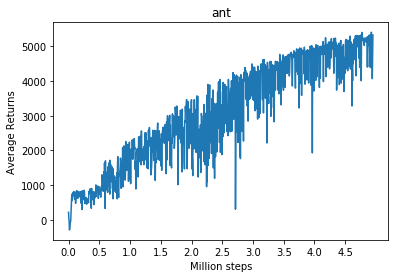

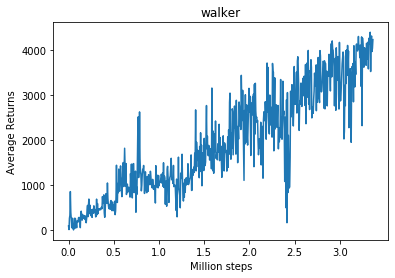

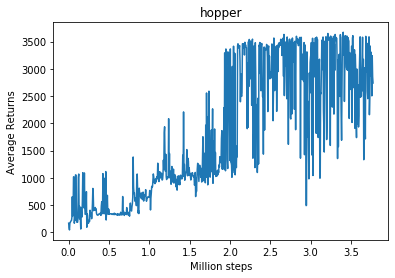

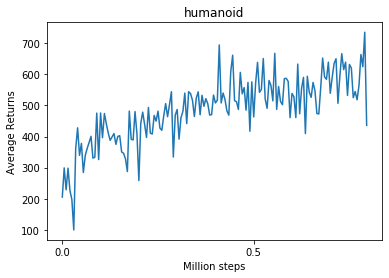

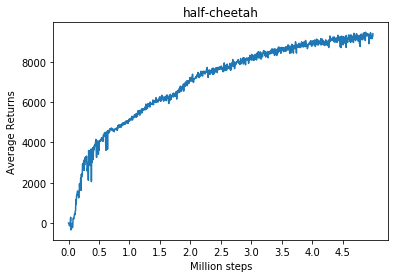

In [83]:
import matplotlib.pyplot as plt
# env='ant'
# env = 'half-cheetah'
# env = 'hopper'
envs = ['ant', 'walker', 'hopper', 'humanoid', 'half-cheetah']
for env in envs:
    
    with open('logs/'+env+'/log2', 'rb') as f:
        d = torch.load(f)
    xs = []
    ys = []
    for k, v in d.items():
        xs.append(k)
        ys.append(float(v['evaluation/Returns Mean']))
    plt.title(env)
    plt.xlabel('Million steps')
    plt.ylabel('Average Returns')
    xs = [float(x) / 200 for x in xs]
    xs = np.array(xs)
    plt.xticks(np.arange(0,np.max(xs), 0.5))
    plt.plot(xs[:], ys[:])
    plt.show()
#     print(len(xs))

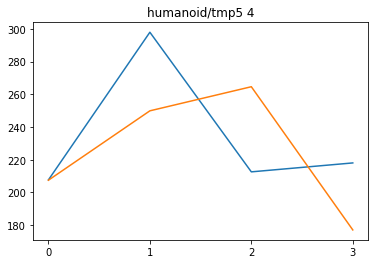

In [38]:
import matplotlib.pyplot as plt
# env='ant'
# env = 'half-cheetah'
# env = 'hopper'
envs = ['humanoid/tmp4', 'humanoid/tmp5']
len_ = 0
# with open('logs/'+envs[0]+'/log2', 'rb') as f:
#     d = torch.load(f)
#     len_ = len(d.items())
len_ = 4
for env in envs:
    
    with open('logs/'+env+'/log2', 'rb') as f:
        d = torch.load(f)
    xs = []
    ys = []
    for k, v in d.items():
        xs.append(k)
        ys.append(float(v['evaluation/Returns Mean']))
    plt.title(env+' '+str(len(xs)))
    plt.plot(xs[:len_], ys[:len_])
#     plt.show()
#     print(len(xs))

In [20]:
# try:
#     d = torch.load('tmp4')
# except:
#     print('except')

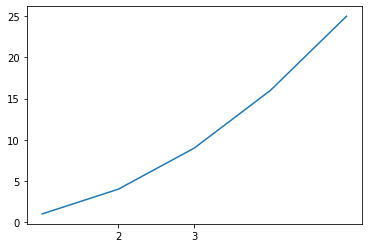

In [44]:
x = [1,2,3,4,5]
x = np.array(x)
y = x**2
plt.xticks([2,3])
plt.plot(x,y)

In [14]:
# d['evaluation/Average Returns']

In [12]:
# d.keys()

In [4]:
# !ls logs/ant

In [3]:
# with open('logs/ant/log1.txt') as f:
#     print(f.readlines())

In [2]:
# with open('../data/experiment-1/experiment-1_2020_04_17_15_59_36_0000--s-0/params.pkl', 'rb') as f:
#     d = torch.load(f)
#     print(d)

In [6]:
# f.close()

In [7]:
# !pwd

In [8]:
# !ls data/experiment-1 | wc -l

In [9]:
# !cd ~/Desktop/rlkit/

In [10]:
# !

In [11]:
# !find . -type f -name '*params*' | sed -r 's|/[^/]+$||' |sort |uniq > tmp2.txt

In [12]:
# import pickle as pkl
# import torch

In [13]:
# with open('tmp2.txt') as f2:
#     l = f2.readlines()
#     for ll in l:
#         ll2 = ll[:-1]
# #         print(ll2)
# #         print(ll)
# #         break
#         with open(ll2+'/params.pkl', 'rb') as f3:
#             d = torch.load(f3)
#             print(d)
#             break

In [14]:
# from rlkit.core.tabulate import tabulate

In [15]:
# print(tabulate([['hello', '1'],['hi', '2']]))

In [16]:
# !ls ~/Desktop/rlkit/data/experiment-1/experiment-1_2020_04_13_15_13_48_0000--s-0

In [88]:
import gym.envs.mujoco.walker2d_v3

In [11]:
# from gym.envs.mujoco import walker_v3

In [12]:
# humanoid_v3.HumanoidEnv()

In [49]:
# !cd ./data/experiment-1/experiment-1_2020_04_13_15_13_48_0000--s-0


In [51]:
# !find --help

In [85]:
torch.load('logs/humanoid/log2').keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6'])

In [100]:
DEFAULT_KEY = "__DEFAULT_KEY__"
TOTAL_STEPS_PER_UNIVERSE_DOMAIN_TASK = {
    DEFAULT_KEY: int(1e4),
    'gym': {
        DEFAULT_KEY: int(1e4),
        'Swimmer': {
            DEFAULT_KEY: int(1e5),
            'v3': int(5e5),
        },
        'Hopper': {
            DEFAULT_KEY: int(5e6),
            'v3': int(5e6),
        },
        'HalfCheetah': {
            DEFAULT_KEY: int(3e6),
            'v3': int(3e6),
        },
        'Walker2d': {
            DEFAULT_KEY: int(5e6),
            'v3': int(5e6),
        },
        'Ant': {
            DEFAULT_KEY: int(3e6),
            'v3': int(3e6),
        },
        'Humanoid': {
            DEFAULT_KEY: int(3e6),
            'Stand-v3': int(1e8),
            'SimpleStand-v3': int(1e8),
            'v3': int(1e8),
        },
        'Pendulum': {
            DEFAULT_KEY: int(1e4),
            'v3': int(1e4),
        },
        'Point2DEnv': {
            DEFAULT_KEY: int(5e4),
        }
    },
    'dm_control': {
        # BENCHMARKING
        DEFAULT_KEY: int(3e6),
        'acrobot': {
            DEFAULT_KEY: int(3e6),
            # 'swingup': int(None),
            # 'swingup_sparse': int(None),
        },
        'ball_in_cup': {
            DEFAULT_KEY: int(3e6),
            # 'catch': int(None),
        },
        'cartpole': {
            DEFAULT_KEY: int(3e6),
            # 'balance': int(None),
            # 'balance_sparse': int(None),
            # 'swingup': int(None),
            # 'swingup_sparse': int(None),
            # 'three_poles': int(None),
            # 'two_poles': int(None),
        },
        'cheetah': {
            DEFAULT_KEY: int(3e6),
            'run': int(1e7),
        },
        'finger': {
            DEFAULT_KEY: int(3e6),
            # 'spin': int(None),
            # 'turn_easy': int(None),
            # 'turn_hard': int(None),
        },
        'fish': {
            DEFAULT_KEY: int(3e6),
            # 'upright': int(None),
            # 'swim': int(None),
        },
        'hopper': {
            DEFAULT_KEY: int(3e6),
            # 'stand': int(None),
            'hop': int(1e7),
        },
        'humanoid': {
            DEFAULT_KEY: int(1e7),
            'stand': int(1e7),
            'walk': int(1e7),
            'run': int(1e7),
            # 'run_pure_state': int(1e7),
        },
        'manipulator': {
            DEFAULT_KEY: int(3e6),
            'bring_ball': int(1e7),
            # 'bring_peg': int(None),
            # 'insert_ball': int(None),
            # 'insert_peg': int(None),
        },
        'pendulum': {
            DEFAULT_KEY: int(3e6),
            # 'swingup': int(None),
        },
        'point_mass': {
            DEFAULT_KEY: int(3e6),
            # 'easy': int(None),
            # 'hard': int(None),
        },
        'reacher': {
            DEFAULT_KEY: int(3e6),
            # 'easy': int(None),
            # 'hard': int(None),
        },
        'swimmer': {
            DEFAULT_KEY: int(3e6),
            # 'swimmer6': int(None),
            # 'swimmer15': int(None),
        },
        'walker': {
            DEFAULT_KEY: int(3e6),
            # 'stand': int(None),
            'walk': int(1e7),
            'run': int(1e7),
        },
        # EXTRA
        'humanoid_CMU': {
            DEFAULT_KEY: int(3e6),
            'run': int(1e7),
            # 'stand': int(None),
        },
        'quadruped': {
            DEFAULT_KEY: int(3e6),
            'run': int(1e7),
            'walk': int(1e7),
        },
    },
}

In [105]:
level_result = TOTAL_STEPS_PER_UNIVERSE_DOMAIN_TASK.copy()
isinstance(level_result, (int, float))
universe, domain, task = 'gym', 'Humanoid', 'v3'
for level_key in (universe, domain, task):
    if isinstance(level_result, (int, float)):
        print(level_result)

    level_result = (
        level_result.get(level_key)
        or level_result[DEFAULT_KEY])
print(level_result)

100000000


In [30]:
import torch
import numpy as np
import random

In [82]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
x = torch.FloatTensor(2,1)
x.data.uniform_(-100,100)
print(x)
np.random.randint(2)

tensor([[-0.7487],
        [53.6444]])


0

In [75]:
# np.random.randint(2)